# Laptop Price Prediction - Regression

###### BU ÖDEVİMİZDE LAPTOP FİYATLARINI VERİLEN DATAYA GÖRE TAHMİN EDEN BİR MODEL GELİŞTİRECEĞİZ.

In [1]:
import pandas as pd #Data dosyalarunu okuma paketi
pd.set_option("display.max_columns",55)
import seaborn as sns
from scipy.stats import ttest_ind
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('laptop_data.csv')

In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.corr(numeric_only=True)


,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


In [9]:
#### YETERLİ VERİ OKUYAMIYORUZ.VERİLERİ ELLEÇLEYİP OKUNACAK HALE GETİRECEĞİZ.

In [10]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [12]:
df['Company']

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [13]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [14]:
df['Company'].nunique()

19

In [15]:
import seaborn as sns
import matplotlib as plt

<Axes: xlabel='Company', ylabel='count'>

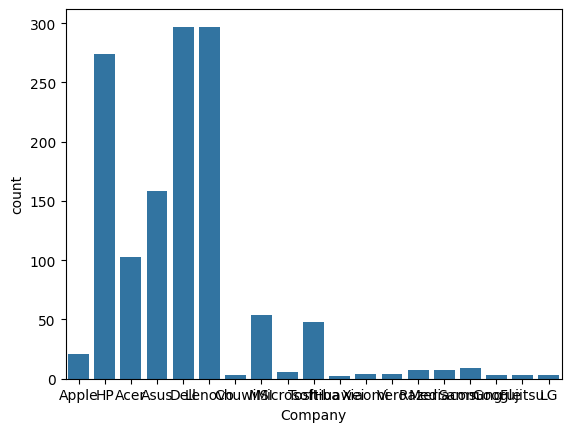

In [16]:
sns.countplot(x=df['Company'])


In [17]:
df['Company']=df['Company'].sort_values(ascending=True)

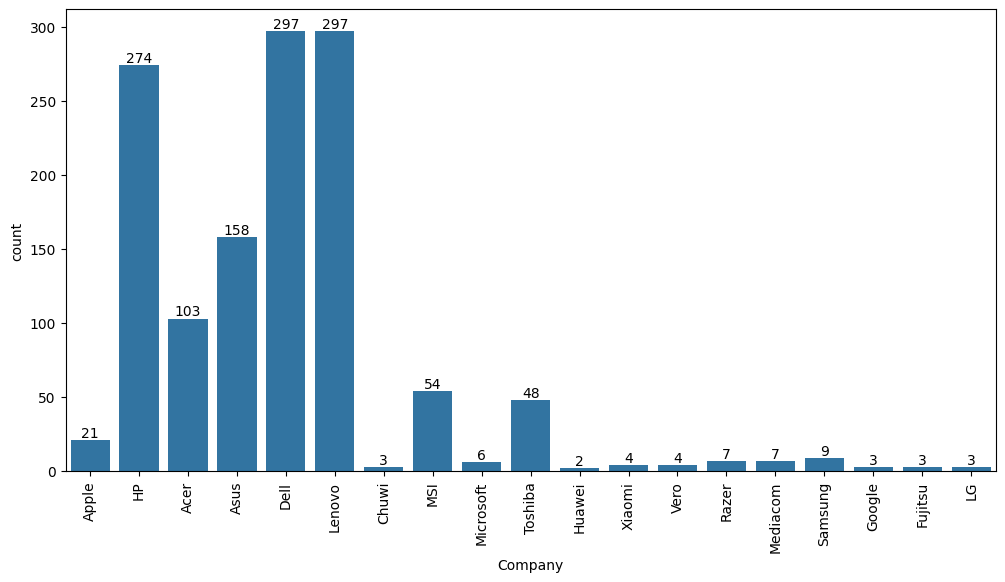

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafiği oluşturun
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df["Company"], ax=ax)

# X eksenindeki etiketleri dik yazdırmak için
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0])
# Grafiği gösterin
plt.show()

In [19]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [20]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [21]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [22]:
import re

In [23]:
import pandas as pd
import numpy as np

In [24]:
#### KOLONLARI YAZI TİPİNDEN SAYI TİPİNE ÇEVİRİYORUZ.

In [25]:
df['Weight'] =df['Weight'].str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(float)

In [26]:
df['Ram'] =df['Ram'].str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(int)

In [27]:
df['Memory'] =df['Memory'].str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(float)

In [29]:
df.describe()

,Unnamed: 0,Inches,Ram,Memory,Weight,Price
count,1303.00000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,651.00000,15.017191,8.382195,226.408289,2.038734,59870.042910
std,376.28801,1.426304,5.084665,174.609551,0.665475,37243.201786
min,0.00000,10.100000,2.000000,1.000000,0.690000,9270.720000
25%,325.50000,14.000000,4.000000,64.000000,1.500000,31914.720000
50%,651.00000,15.600000,8.000000,256.000000,2.040000,52054.560000
75%,976.50000,15.600000,8.000000,256.000000,2.300000,79274.246400
max,1302.00000,18.400000,64.000000,512.000000,4.700000,324954.720000


In [30]:
df.head(3)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000


In [31]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [32]:
df.shape

(1303, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   float64
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 117.2+ KB


In [34]:
df.drop(columns=["Unnamed: 0"], inplace=True) ###BU KOLON GEREKSİZ ODUĞU İÇİN KALDIRIYORUZ


In [35]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [36]:
# DOKUNMATİK EKRAN SEÇENEĞİNE GÖRE AYIRIYORUZ.
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [38]:
df.corr(numeric_only=True)

,Inches,Ram,Memory,Weight,Price,Touchscreen
Inches,1.000000,0.237993,-0.098539,0.827631,0.068197,-0.361735
Ram,0.237993,1.000000,0.184002,0.383874,0.743007,0.116984
Memory,-0.098539,0.184002,1.000000,-0.105692,0.298177,0.092424
Weight,0.827631,0.383874,-0.105692,1.000000,0.210370,-0.294620
Price,0.068197,0.743007,0.298177,0.210370,1.000000,0.191226
Touchscreen,-0.361735,0.116984,0.092424,-0.294620,0.191226,1.000000


<Axes: xlabel='Touchscreen'>

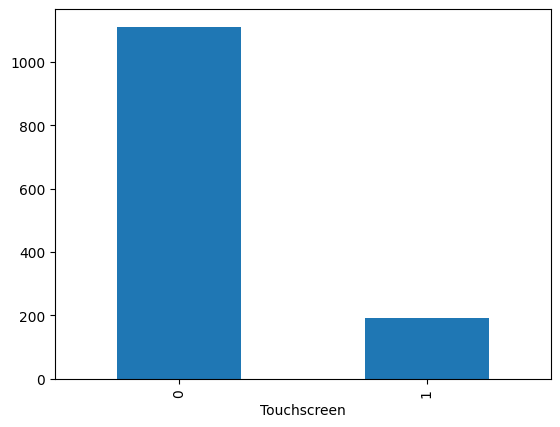

In [39]:

df['Touchscreen'].value_counts().plot(kind='bar')

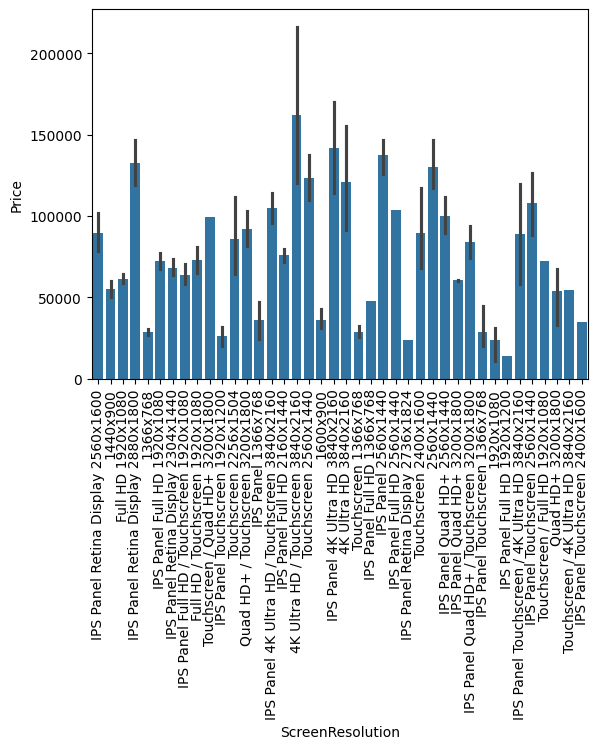

In [40]:
sns.barplot(x=df['ScreenResolution'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
## https://github.com/ajinkode/Laptop-Price-Predictor/blob/main/Laptop%20Price%20Predictor.ipynb <<<ADRSİNDEN YARDIM ALARAK AŞAĞIDAKİ DÖNÜŞÜMÜ YAPTIM.

In [42]:
# Let's create a new column called 'IPS' indicating whether a laptop has IPS Panel or not
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [43]:
# Let's create a variable which splits the 'Screen Resolution' column with 'x' as delimiter
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [44]:
# Let's create two new columns X_res and Y_res to store the x and y resolutions of the screen
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [45]:
# Since X_res has unnecessary data let's remove that and only keep the X_res value
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [46]:
# Convert X_res and Y_res datatype from sting to int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   float64
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 137.6+ KB


In [48]:
# Let's split the data in Cpu column into words
df['Cpu'].apply(lambda x: x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [49]:
# Let's create a new column CPU Name whoch stores only the first three words of the Cpu column
df['CPU Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [50]:
# This function takes a Cpu name as input ans returns the CPU Brand of it

def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
            

In [51]:
# Let's create CPU Brand column using the above function
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

<Axes: xlabel='CPU Brand'>

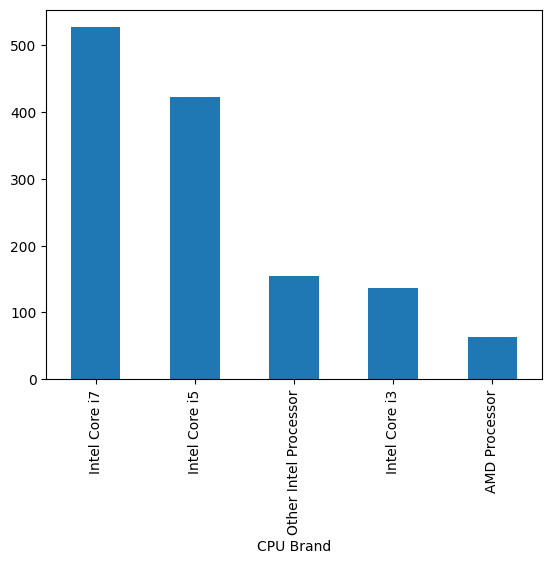

In [52]:
df['CPU Brand'].value_counts().plot(kind='bar')

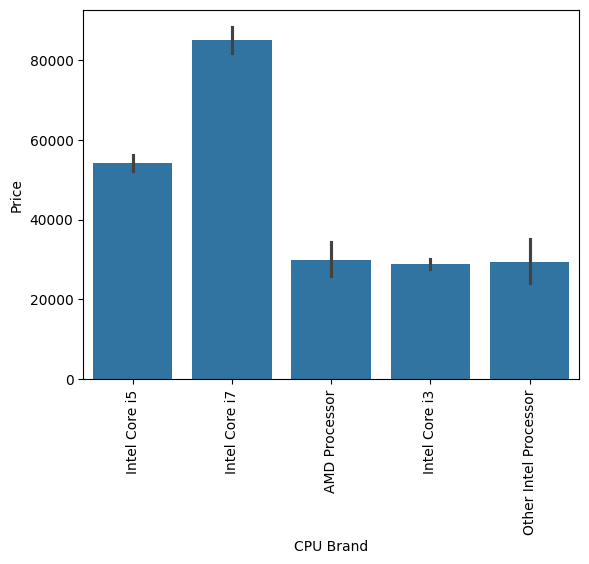

In [53]:
sns.barplot(x=df['CPU Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.drop(['Cpu', 'CPU Name'], inplace=True, axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   float64
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  IPS               1303 non-null   int64  
 12  X_res             1303 non-null   int32  
 13  Y_res             1303 non-null   int32  
 14  CPU Brand         1303 non-null   object 
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 137.6+ KB


<Axes: xlabel='Gpu'>

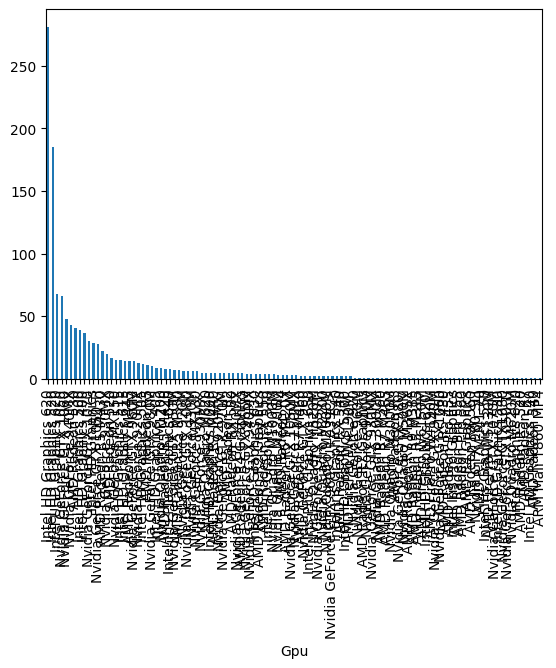

In [56]:

df['Gpu'].value_counts().plot(kind='bar')

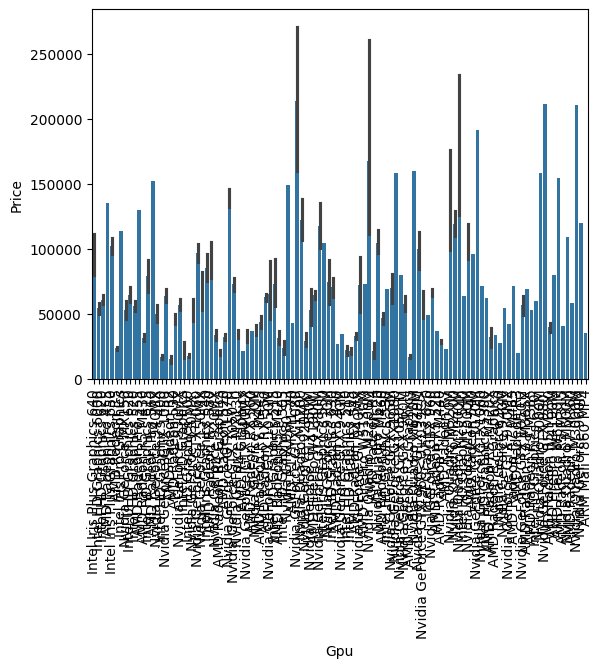

In [57]:
sns.barplot(x=df['Gpu'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,CPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128.0,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512.0,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,2,64.0,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,Other Intel Processor
1301,HP,Notebook,15.6,1366x768,6,1.0,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,Intel Core i7


In [59]:
# Let's create a new column GPU Brand which takes the first word of column Gpu and stores it
df['GPU Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [60]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,CPU Brand,GPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128.0,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,Intel Core i7,Intel
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512.0,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,Intel Core i7,Intel
1300,Lenovo,Notebook,14.0,1366x768,2,64.0,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,Other Intel Processor,Intel
1301,HP,Notebook,15.6,1366x768,6,1.0,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,Intel Core i7,AMD


In [61]:
df = df[df['GPU Brand'] != 'ARM']

In [62]:
# Let's drop Gpu column
df.drop(columns=['Gpu'], inplace=True)

In [63]:
# The below function takes a oeprating system as parameter and returns whether the OS is Windows,
# Mac or Other

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [64]:
# Let's create a new column OS using the above function
df['OS'] = df['OpSys'].apply(cat_os)

In [65]:
# Let's drop OpSys column
df.drop(columns=['OpSys'], inplace=True)

In [66]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [67]:
df['OS'].value_counts()

OS
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Ram          1302 non-null   int32  
 4   Memory       1302 non-null   float64
 5   Weight       1302 non-null   float64
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   IPS          1302 non-null   int64  
 9   X_res        1302 non-null   int32  
 10  Y_res        1302 non-null   int32  
 11  CPU Brand    1302 non-null   object 
 12  GPU Brand    1302 non-null   object 
 13  OS           1302 non-null   object 
dtypes: float64(4), int32(3), int64(2), object(5)
memory usage: 137.3+ KB


In [69]:
df

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,X_res,Y_res,CPU Brand,GPU Brand,OS
0,Apple,Ultrabook,13.3,8,128.0,1.37,71378.6832,0,1,2560,1600,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,8,128.0,1.34,47895.5232,0,0,1440,900,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,8,256.0,1.86,30636.0000,0,0,1920,1080,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,512.0,1.83,135195.3360,0,1,2880,1800,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,8,256.0,1.37,96095.8080,0,1,2560,1600,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128.0,1.80,33992.6400,1,1,1920,1080,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,512.0,1.30,79866.7200,1,1,3200,1800,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,14.0,2,64.0,1.50,12201.1200,0,0,1366,768,Other Intel Processor,Intel,Windows
1301,HP,Notebook,15.6,6,1.0,2.19,40705.9200,0,0,1366,768,Intel Core i7,AMD,Windows


In [ ]:
### POE (YAPAY ZEKA) DEN BU LabelEncoder İ ÖĞRENİP UYGULADIM


In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [72]:
label_encoder = LabelEncoder()
df['Company'] = label_encoder.fit_transform(df['Company'])

In [73]:
label_encoder = LabelEncoder()
df['TypeName'] = label_encoder.fit_transform(df['TypeName'])

In [74]:
label_encoder = LabelEncoder()
df['CPU Brand'] = label_encoder.fit_transform(df['CPU Brand'])

In [75]:
label_encoder = LabelEncoder()
df['GPU Brand'] = label_encoder.fit_transform(df['GPU Brand'])

In [76]:
label_encoder = LabelEncoder()
df['OS'] = label_encoder.fit_transform(df['OS'])

In [ ]:
# Let's now seperate the independent variables(features) and the dependent variable(target)
# X --> features
# y --> target

x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [ ]:
# Importing essential libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
# Importing essential libraries to use different regression models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred) )

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
bootstrap = True

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None if bootstrap else 0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable
#RegressionFuntion.py
#RegressionFuntion.py #görüntüleniyor.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
g=GaussianNB()

In [ ]:
# Let's now seperate the independent variables(features) and the dependent variable(target)
# X --> features
# y --> target

x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
model=g.fit(x,y)
tahmin=g.predict(test)

In [ ]:
df

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
_,p=ttest_ind(df['Price'],df['Weight'])
p

In [ ]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

In [77]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [80]:
x_train.shape ,x_test.shape

((1041, 13), (261, 13))

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()

In [83]:
x=pd.get_dummies(x,drop_first=True)

In [84]:
model=lr.fit(x_train,y_train)

In [85]:
tahmin=model.predict(x_test)

In [86]:
from sklearn.metrics import r2_score, mean_squared_error

In [87]:
mean_squared_error(y_test,tahmin)**0.5

0.37356229095325627

In [88]:
r2_score(y_test,tahmin)

0.6378118915077882

In [89]:
df

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,X_res,Y_res,CPU Brand,GPU Brand,OS
0,1,4,13.3,8,128.0,1.37,71378.6832,0,1,2560,1600,2,1,0
1,1,4,13.3,8,128.0,1.34,47895.5232,0,0,1440,900,2,1,0
2,7,3,15.6,8,256.0,1.86,30636.0000,0,0,1920,1080,2,1,1
3,1,4,15.4,16,512.0,1.83,135195.3360,0,1,2880,1800,3,0,0
4,1,4,13.3,8,256.0,1.37,96095.8080,0,1,2560,1600,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,4,128.0,1.80,33992.6400,1,1,1920,1080,3,1,2
1299,10,0,13.3,16,512.0,1.30,79866.7200,1,1,3200,1800,3,1,2
1300,10,3,14.0,2,64.0,1.50,12201.1200,0,0,1366,768,4,1,2
1301,7,3,15.6,6,1.0,2.19,40705.9200,0,0,1366,768,3,0,2


In [90]:
df.corr(numeric_only=True)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,X_res,Y_res,CPU Brand,GPU Brand,OS
Company,1.000000,-0.004392,-0.082971,0.047991,0.093403,-0.127763,0.141705,0.034968,0.115935,0.054704,0.050464,0.011650,0.038225,0.155474
TypeName,-0.004392,1.000000,-0.080711,-0.244710,0.057328,-0.269762,-0.128608,-0.414963,-0.160725,-0.083335,-0.066997,-0.117511,-0.248380,-0.111208
Inches,-0.082971,-0.080711,1.000000,0.237129,-0.100358,0.827397,0.067329,-0.359514,-0.112726,-0.069875,-0.092934,-0.186115,0.236978,0.083561
Ram,0.047991,-0.244710,0.237129,1.000000,0.183405,0.383362,0.742905,0.118875,0.207949,0.434095,0.426357,0.224361,0.346603,0.121304
Memory,0.093403,0.057328,-0.100358,0.183405,1.000000,-0.106959,0.297800,0.094737,0.071152,0.156245,0.158320,0.038036,0.006743,0.079908
Weight,-0.127763,-0.269762,0.827397,0.383362,-0.106959,1.000000,0.209867,-0.293004,0.018643,-0.031866,-0.052041,-0.057940,0.346947,0.080699
Price,0.141705,-0.128608,0.067329,0.742905,0.297800,0.209867,1.000000,0.192917,0.253320,0.557369,0.554591,0.245597,0.355788,0.176937
Touchscreen,0.034968,-0.414963,-0.359514,0.118875,0.094737,-0.293004,0.192917,1.000000,0.148026,0.350097,0.355756,0.124365,-0.041264,0.097571
IPS,0.115935,-0.160725,-0.112726,0.207949,0.071152,0.018643,0.253320,0.148026,1.000000,0.280588,0.287404,0.131963,0.173592,0.005775
X_res,0.054704,-0.083335,-0.069875,0.434095,0.156245,-0.031866,0.557369,0.350097,0.280588,1.000000,0.994480,0.152866,0.187221,0.069123


In [91]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price          1.000000
Ram            0.742905
X_res          0.557369
Y_res          0.554591
GPU Brand      0.355788
Memory         0.297800
IPS            0.253320
CPU Brand      0.245597
Weight         0.209867
Touchscreen    0.192917
OS             0.176937
Company        0.141705
Inches         0.067329
TypeName       0.128608
Name: Price, dtype: float64

In [104]:
x = df.drop(columns=['Price','Inches','TypeName','Company'])
y = np.log(df['Price'])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr=LinearRegression()

In [109]:
x=pd.get_dummies(x,drop_first=True)

In [110]:
model=lr.fit(x_train,y_train)

In [111]:
tahmin=model.predict(x_test)

In [112]:
from sklearn.metrics import r2_score, mean_squared_error

In [113]:
mean_squared_error(y_test,tahmin)**0.5

0.37543633250357294

In [114]:
r2_score(y_test,tahmin)

0.6341688144107829

In [115]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [116]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [117]:
Rmodel=R.fit(x_train,y_train)

In [118]:
tahmin2=Rmodel.predict(x_test)

In [119]:
mean_squared_error(y_test,tahmin2)**0.5

0.3754626251057755

In [120]:
r2_score(y_test,tahmin2)

0.6341175727497579

In [121]:
Lmodel=L.fit(x_train,y_train)

In [122]:
tahmin3=Lmodel.predict(x_test)

In [123]:
mean_squared_error(y_test,tahmin3)**0.5

0.45336240007081957

In [124]:
r2_score(y_test,tahmin3)

0.4665433608533919

In [125]:
Emodel=E.fit(x_train,y_train)

In [126]:
tahmin4=Emodel.predict(x_test)

In [127]:
mean_squared_error(y_test,tahmin4)**0.5

0.4217132258553746

In [128]:
r2_score(y_test,tahmin4)

0.538424689715965

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
dt=DecisionTreeRegressor()

In [131]:
Dmodel=dt.fit(x_train,y_train)


In [132]:
tahmin5=dt.predict(x_test)

In [133]:
mean_squared_error(y_test,tahmin5)**0.5

0.3192464987119797

In [134]:
r2_score(y_test,tahmin5)

0.7354788435008629

In [135]:
from sklearn.ensemble import ExtraTreesRegressor

In [136]:
ET=ExtraTreesRegressor()

In [137]:
ETModel=ET.fit(x_train, y_train)

In [138]:
tahmin6=ET.predict(x_test)

In [139]:
mean_squared_error(y_test,tahmin6)**0.5

0.25316948241661097

In [140]:
r2_score(y_test,tahmin6)

0.8336469244920637